# Importing dependencies

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.debugger import set_trace

In [2]:
df = pd.read_csv('data/train.csv')

In [3]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
df.nunique().T

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8514.0,28.827930,14.489021,0.0,19.0,27.0,38.0,79.0
RoomService,8512.0,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,458.077203,1611.489240,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8485.0,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0
Spa,8510.0,311.138778,1136.705535,0.0,0.0,0.0,59.0,22408.0
VRDeck,8505.0,304.854791,1145.717189,0.0,0.0,0.0,46.0,24133.0


# Exploratory Data Analysis

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


Text(0.5, 0, 'Age (years)')

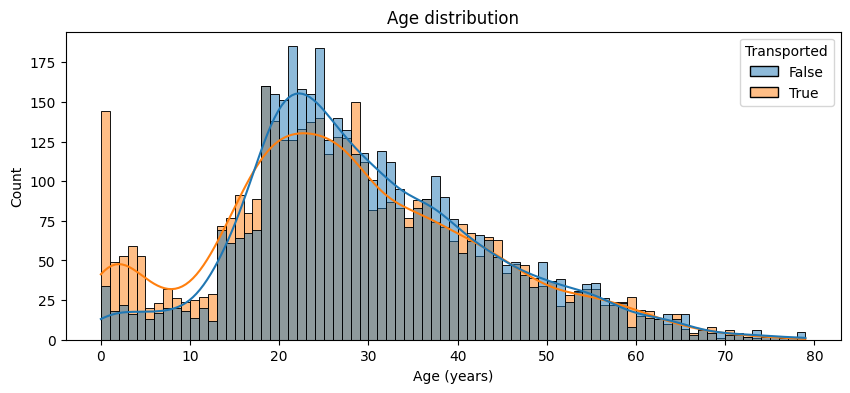

In [8]:
# Figure size
plt.figure(figsize=(10,4))

# Histogram
sns.histplot(data=df, x='Age', hue='Transported', binwidth=1, kde=True)

# Aesthetics
plt.title('Age distribution')
plt.xlabel('Age (years)')

# Why do we want a histplot?
# Remember that for numeric features we want to group them into different buckets/ranges.
# For categorical, it makes sense to count each (not in range/bucket)

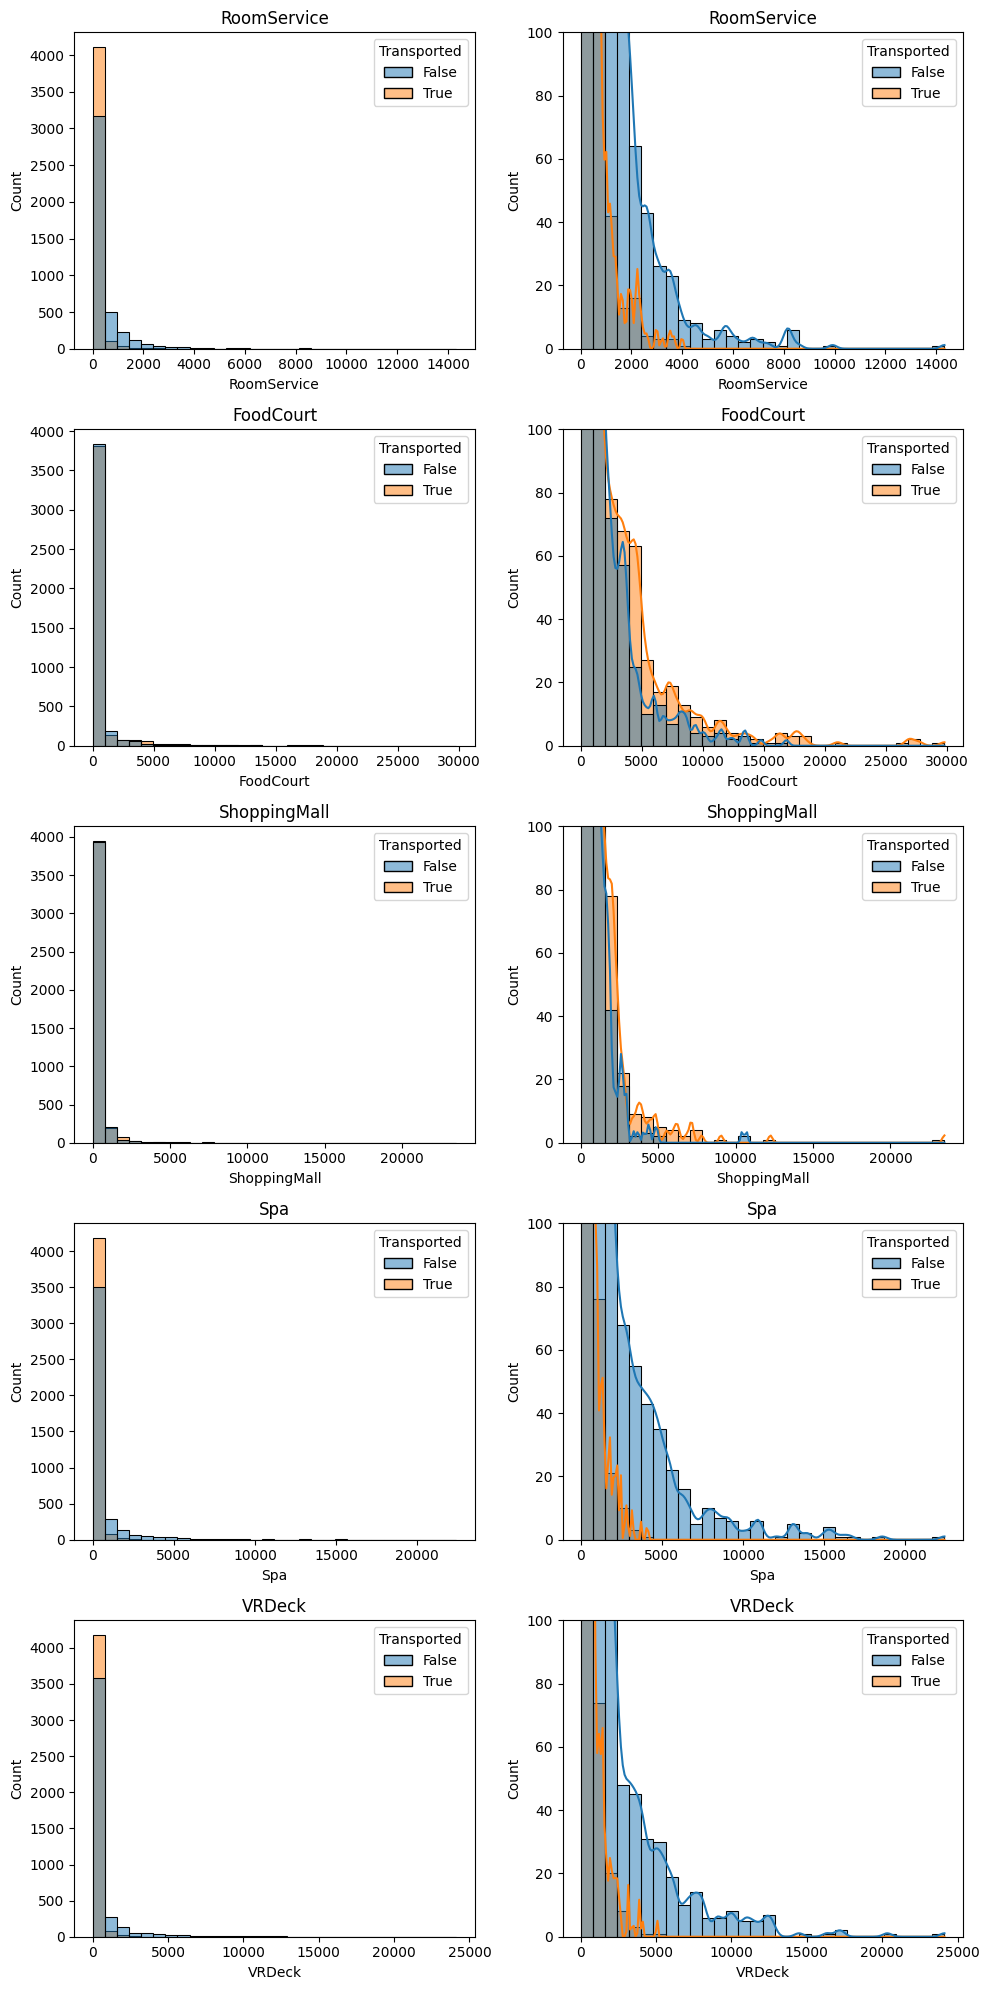

In [9]:
# Expenditure features
exp_feats=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Plot expenditure features
fig=plt.figure(figsize=(10,20))
for i, var_name in enumerate(exp_feats):
    # Left plot
    ax=fig.add_subplot(5,2,2*i+1)
    sns.histplot(data=df, x=var_name, axes=ax, bins=30, kde=False, hue='Transported')
    ax.set_title(var_name)

    # Right plot (truncated)
    ax=fig.add_subplot(5,2,2*i+2)
    sns.histplot(data=df, x=var_name, axes=ax, bins=30, kde=True, hue='Transported')
    plt.ylim([0,100])
    ax.set_title(var_name)
fig.tight_layout()  # Improves appearance a bit
plt.show()

In [10]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


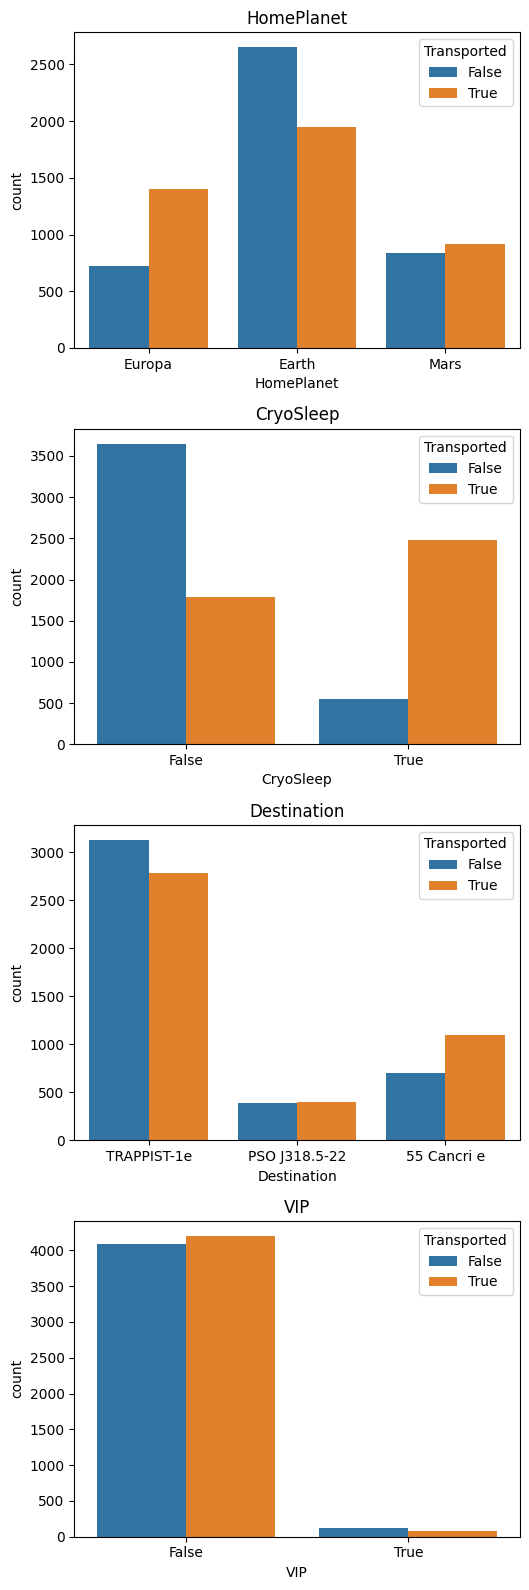

In [11]:
cat_feats = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

fig = plt.figure(figsize=(10, 16))

for i, var_name in enumerate(cat_feats):
    # Left plot
    ax=fig.add_subplot(4,2,2*i+1)
    sns.countplot(data=df, x=var_name, axes=ax, hue='Transported')
    ax.set_title(var_name)

fig.tight_layout()  # Improves appearance a bit
plt.show()

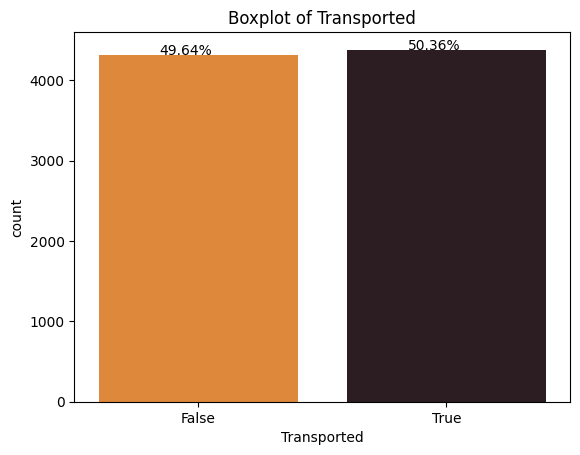

In [12]:
# Let's start exploring the target variable, Transported

colors=['#F98620', '#2F1A21']

ax = sns.countplot(data=df, x='Transported', palette=colors)

# Calculate the total number of observations
total = len(df['Transported'])

# Annotate the percentages on top of each bar
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.2f}%'
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_height() + 5
    ax.annotate(percentage, (x, y), ha='center')

plt.title('Boxplot of Transported')
plt.show()

In [13]:
# Let's take a look at the qualitative features

qual_feats = ['PassengerId', 'Cabin', 'Name']

In [14]:
df[qual_feats].head()

,PassengerId,Cabin,Name
0,0001_01,B/0/P,Maham Ofracculy
1,0002_01,F/0/S,Juanna Vines
2,0003_01,A/0/S,Altark Susent
3,0003_02,A/0/S,Solam Susent
4,0004_01,F/1/S,Willy Santantines


In [15]:
# From PassengerId we can extract group and number.
# We can also split the Cabin feature into deck/num/side
# Name can be grouped into families!!

# Feature Engineering

In [16]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [17]:
# Create two new columns, one for group and other for the number

df['PassengerGNumber'] = df['PassengerId'].str.slice(stop=4)
df['Group'] = df['PassengerId'].str.slice(start=5)

df.drop(columns='PassengerId', inplace=True)

In [18]:
df = df[['PassengerGNumber', 'Group', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name','Transported']]

In [19]:
# Let's do the slice the Cabin as well.
# To get the num, regex expressions are needed!..

df['Deck'] = df.Cabin.str.slice(stop=1)
df['CabinNum'] = df.Cabin.str.extract(r'/(\d+)/').iloc[:,0]
df['Side'] = df.Cabin.str.slice(start=-1)

df.drop(columns='Cabin', inplace=True)

In [20]:
df['LastName'] = df['Name'].str.split(' ', expand=True)[1]

In [21]:
# Count occurrences of each last name
last_name_counts = df['LastName'].value_counts()

# # Create the family_size column
df['FamilySize'] = df['LastName'].map(last_name_counts)

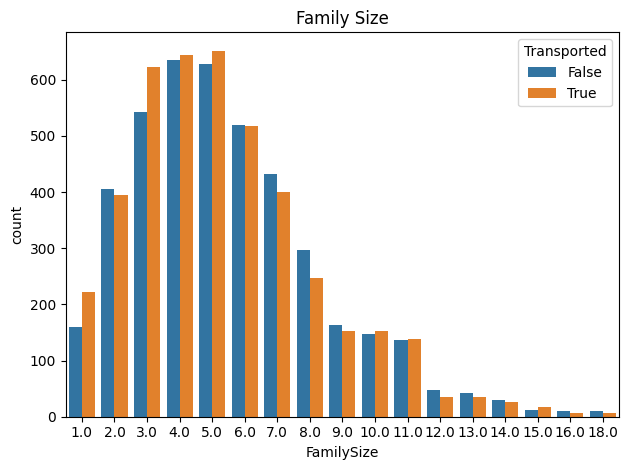

In [22]:
sns.countplot(data=df, hue='Transported', x='FamilySize')
plt.title('Family Size')
plt.tight_layout()

In [23]:
# Uno puede craer mas y mas features con tal que tengas una logica ahi que entre comillas pueda ensenarle al modelo.
# Con tal que no contenga informacion del future, que no tendremos en el test, no es data leakage.

In [24]:
df.head()

,PassengerGNumber,Group,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,CabinNum,Side,LastName,FamilySize
0,0001,01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P,Ofracculy,1.0
1,0002,01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S,Vines,4.0
2,0003,01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S,Susent,6.0
3,0003,02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S,Susent,6.0
4,0004,01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S,Santantines,6.0


In [25]:
exp_feats

['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [26]:
# df['TotalSpent'] = df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna().sum(axis=1)

for i in exp_feats:
    df[f'{i}'].fillna( df[f'{i}'].median(), inplace=True)

df['TotalSpent'] = df[exp_feats].sum(axis=1)


In [27]:
df['NoSpent'] = (df['TotalSpent'] == 0).astype('int')

<AxesSubplot:xlabel='NoSpent', ylabel='count'>

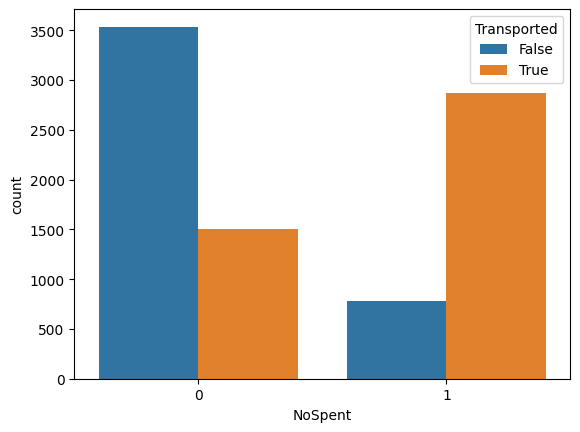

In [28]:
sns.countplot(data=df, x='NoSpent', hue='Transported')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PassengerGNumber  8693 non-null   object 
 1   Group             8693 non-null   object 
 2   HomePlanet        8492 non-null   object 
 3   CryoSleep         8476 non-null   object 
 4   Destination       8511 non-null   object 
 5   Age               8514 non-null   float64
 6   VIP               8490 non-null   object 
 7   RoomService       8693 non-null   float64
 8   FoodCourt         8693 non-null   float64
 9   ShoppingMall      8693 non-null   float64
 10  Spa               8693 non-null   float64
 11  VRDeck            8693 non-null   float64
 12  Name              8493 non-null   object 
 13  Transported       8693 non-null   bool   
 14  Deck              8494 non-null   object 
 15  CabinNum          8494 non-null   object 
 16  Side              8494 non-null   object 


# Missing values

In [30]:
df.head()

,PassengerGNumber,Group,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,VRDeck,Name,Transported,Deck,CabinNum,Side,LastName,FamilySize,TotalSpent,NoSpent
0,0001,01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,0.0,Maham Ofracculy,False,B,0,P,Ofracculy,1.0,0.0,1
1,0002,01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,44.0,Juanna Vines,True,F,0,S,Vines,4.0,736.0,0
2,0003,01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,49.0,Altark Susent,False,A,0,S,Susent,6.0,10383.0,0
3,0003,02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,193.0,Solam Susent,False,A,0,S,Susent,6.0,5176.0,0
4,0004,01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,2.0,Willy Santantines,True,F,1,S,Santantines,6.0,1091.0,0


In [31]:
df.isna().sum()

PassengerGNumber      0
Group                 0
HomePlanet          201
CryoSleep           217
Destination         182
Age                 179
VIP                 203
RoomService           0
FoodCourt             0
ShoppingMall          0
Spa                   0
VRDeck                0
Name                200
Transported           0
Deck                199
CabinNum            199
Side                199
LastName            200
FamilySize          200
TotalSpent            0
NoSpent               0
dtype: int64

In [32]:
# Imputing with mode for categorical features.

df['Deck'].fillna(df['Deck'].mode()[0], inplace=True)
df['CabinNum'].fillna(df['VIP'].mode()[0], inplace=True)
df['Side'].fillna(df['Side'].mode()[0], inplace=True)
df['HomePlanet'].fillna(df['HomePlanet'].mode()[0], inplace=True)
df['Destination'].fillna(df['Destination'].mode()[0], inplace=True)
df['CryoSleep'].fillna(df['CryoSleep'].mode()[0], inplace=True)
df['VIP'].fillna(df['VIP'].mode()[0], inplace=True)

In [33]:
# Imputing with median for continuous features.

df['FamilySize'].fillna(df['FamilySize'].median(), inplace=True)
df['Age'].fillna(df['Age'].median(), inplace=True)

In [34]:
df.drop(columns=['Name', 'LastName'], inplace=True)

In [35]:
df.isna().sum()

PassengerGNumber    0
Group               0
HomePlanet          0
CryoSleep           0
Destination         0
Age                 0
VIP                 0
RoomService         0
FoodCourt           0
ShoppingMall        0
Spa                 0
VRDeck              0
Transported         0
Deck                0
CabinNum            0
Side                0
FamilySize          0
TotalSpent          0
NoSpent             0
dtype: int64

In [36]:
# All this variables, two of them being booleans, need to converted into integers for the ML models.

df.CryoSleep = df.CryoSleep.astype(int)
df.Transported = df.Transported.astype(int)
df.PassengerGNumber = df.PassengerGNumber.astype(int)

# Preprocessing

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PassengerGNumber  8693 non-null   object 
 1   Group             8693 non-null   object 
 2   HomePlanet        8693 non-null   object 
 3   CryoSleep         8693 non-null   int64  
 4   Destination       8693 non-null   object 
 5   Age               8693 non-null   float64
 6   VIP               8693 non-null   bool   
 7   RoomService       8693 non-null   float64
 8   FoodCourt         8693 non-null   float64
 9   ShoppingMall      8693 non-null   float64
 10  Spa               8693 non-null   float64
 11  VRDeck            8693 non-null   float64
 12  Transported       8693 non-null   int64  
 13  Deck              8693 non-null   object 
 14  CabinNum          8693 non-null   object 
 15  Side              8693 non-null   object 
 16  FamilySize        8693 non-null   float64


In [38]:
# To do:

# One hot encode the categorical values.
# Scale numerical values... but which scaler!! When to log first?

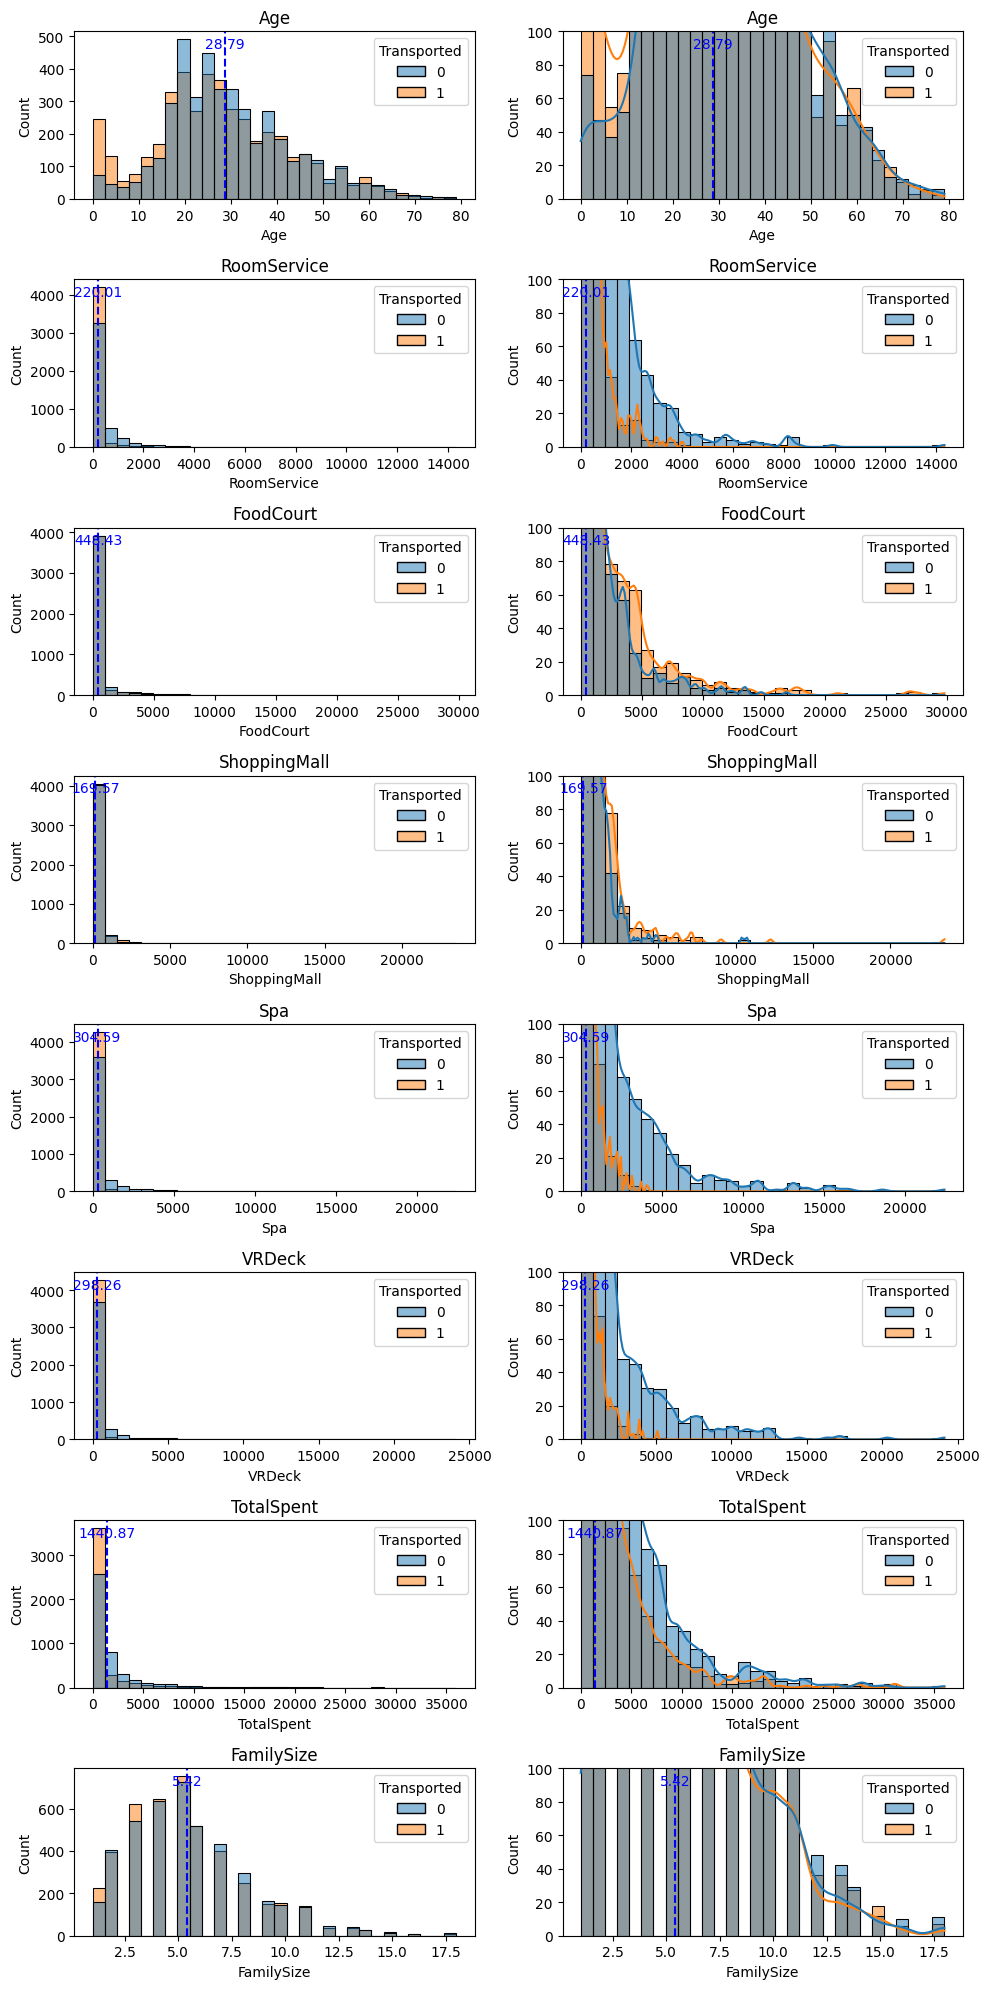

In [39]:
# Expenditure features
num_feats = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'TotalSpent', 'FamilySize']

# Plot expenditure features
fig = plt.figure(figsize=(10, 20))

for i, var_name in enumerate(num_feats):
    # Calculate the mean for the current feature
    mean_value = df[var_name].mean()

    # Left plot (without KDE)
    ax = fig.add_subplot(8, 2, 2 * i + 1)
    sns.histplot(data=df, x=var_name, ax=ax, bins=30, kde=False, hue='Transported')
    ax.set_title(var_name)

    # Annotate the mean on the left plot
    ax.axvline(mean_value, color='blue', linestyle='--', label=f'Mean: {mean_value:.2f}')
    ax.text(mean_value, ax.get_ylim()[1] * 0.9, f'{mean_value:.2f}', color='blue', ha='center')

    # Right plot (with KDE and truncated y-axis)
    ax = fig.add_subplot(8, 2, 2 * i + 2)
    sns.histplot(data=df, x=var_name, ax=ax, bins=30, kde=True, hue='Transported')
    plt.ylim([0, 100])
    ax.set_title(var_name)

    # Annotate the mean on the right plot
    ax.axvline(mean_value, color='blue', linestyle='--', label=f'Mean: {mean_value:.2f}')
    ax.text(mean_value, ax.get_ylim()[1] * 0.9, f'{mean_value:.2f}', color='blue', ha='center')

# Adjust layout to avoid overlap
fig.tight_layout()
plt.show()

Insights:

- All expenditures features are heavily skewed, need to log transform.
- Age and Family Size seem normally distributed. Will apply StandardScaler().

In [40]:
# Firstly, let's check what seems to be better to fix skewness, box-cox or log for expenditure features.

In [41]:
exp_feats.append('TotalSpent')

exp_feats

['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'TotalSpent']

In [42]:
logged = pd.DataFrame()

for i in exp_feats:
    logged[f'{i}'] = np.log(1 + df[i])

logged

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,TotalSpent
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,4.700480,2.302585,3.258097,6.309918,3.806662,6.602588
2,3.784190,8.182280,0.000000,8.812248,3.912023,9.248021
3,0.000000,7.157735,5.918894,8.110728,5.267858,8.551981
4,5.717028,4.262680,5.023881,6.338594,1.098612,6.995766
...,...,...,...,...,...,...
8688,0.000000,8.827615,0.000000,7.404888,4.317488,9.052165
8689,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8690,0.000000,0.000000,7.535297,0.693147,0.000000,7.535830
8691,0.000000,6.956545,0.000000,5.869297,8.082093,8.442039


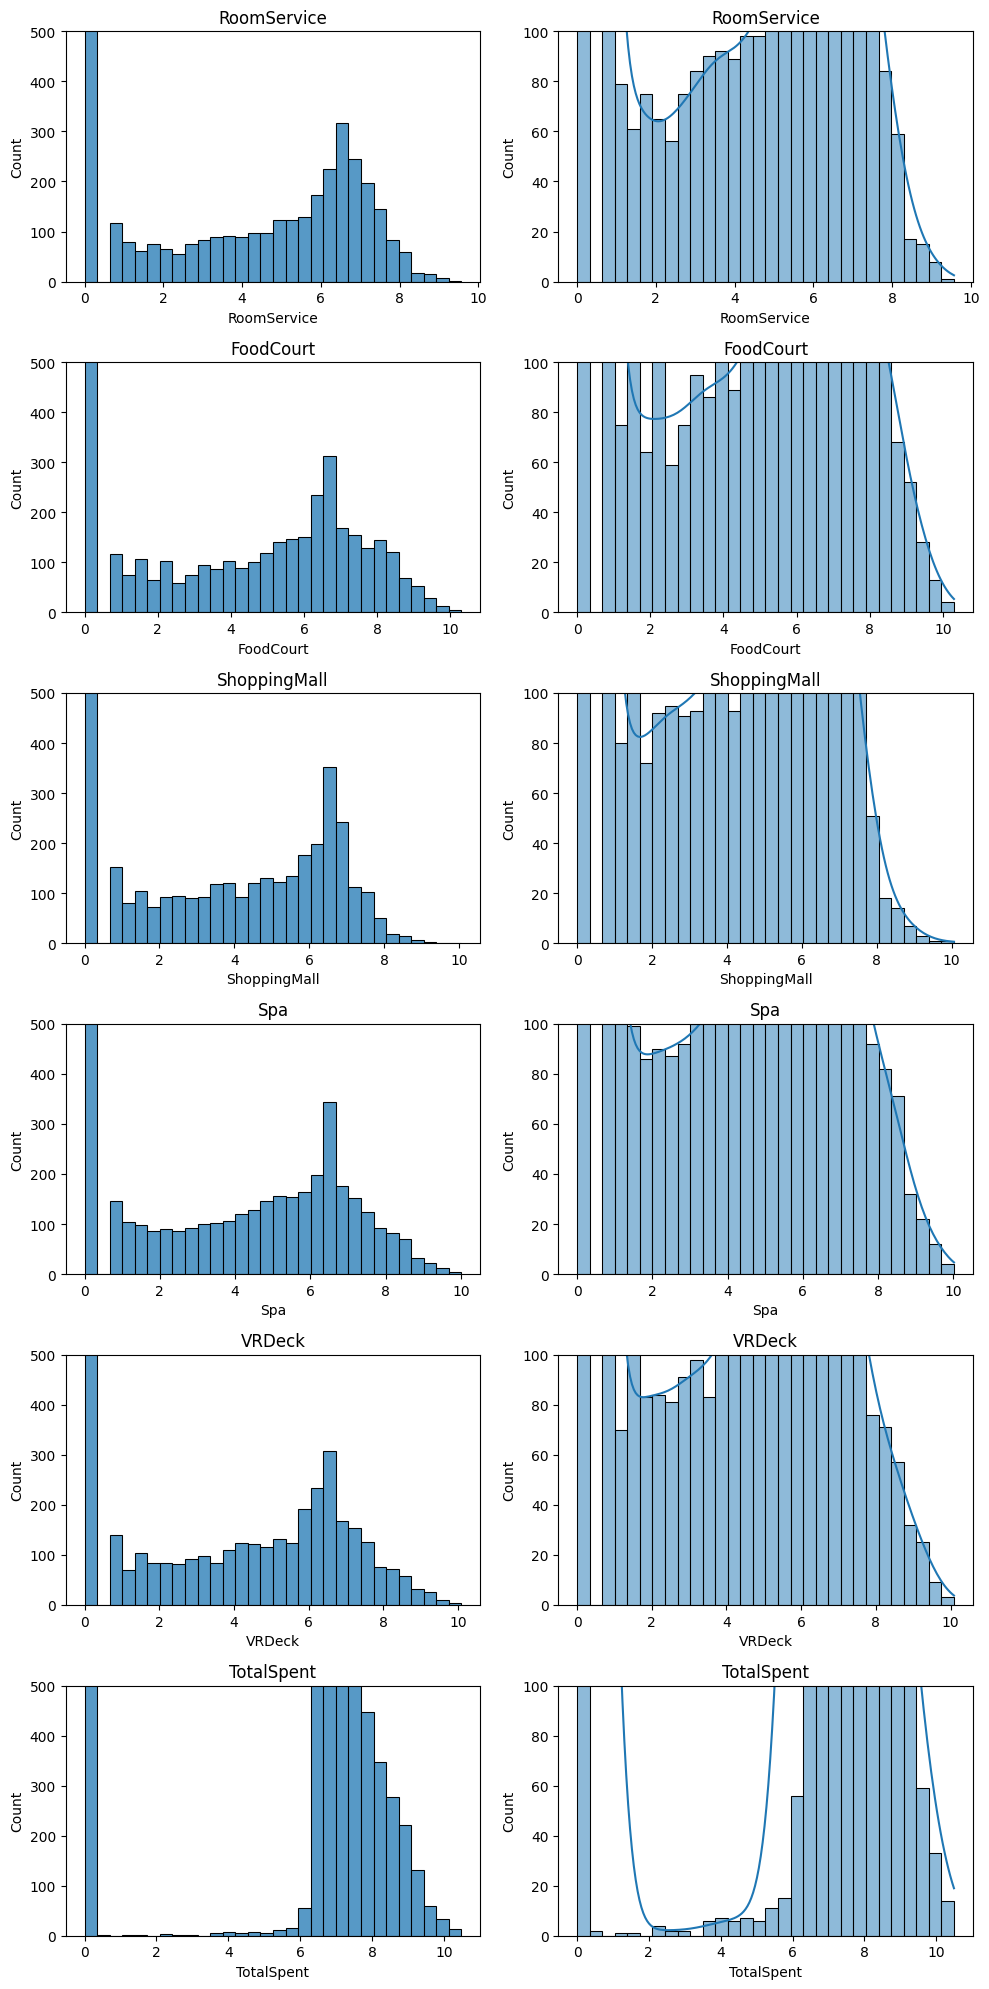

In [43]:
# Plot expenditure features
fig=plt.figure(figsize=(10,20))
for i, var_name in enumerate(exp_feats):
    # Left plot
    ax=fig.add_subplot(6,2,2*i+1)
    sns.histplot(data=logged, x=var_name, axes=ax, bins=30, kde=False)
    plt.ylim([0,500])
    ax.set_title(var_name)

    # Right plot (truncated)
    ax=fig.add_subplot(6,2,2*i+2)
    sns.histplot(data=logged, x=var_name, axes=ax, bins=30, kde=True)
    plt.ylim([0,100])
    ax.set_title(var_name)
fig.tight_layout()  # Improves appearance a bit
plt.show()

In [44]:
from sklearn.preprocessing import PowerTransformer, RobustScaler

boxcox = pd.DataFrame()

boxcoxtransformer = PowerTransformer(method='box-cox')

boxcoxtransformer.fit(1 + df[exp_feats])

boxcox[exp_feats] = boxcoxtransformer.transform(1 + df[exp_feats])

boxcox

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,TotalSpent
0,-0.689373,-0.707127,-0.681519,-0.726569,-0.699710,-1.140331
1,1.453068,0.769003,1.274590,1.558440,1.290862,0.576497
2,1.302856,1.655162,-0.681519,1.681922,1.311791,1.501611
3,-0.689373,1.607780,1.633217,1.658768,1.510333,1.242461
4,1.561190,1.300713,1.559902,1.560675,0.236828,0.704061
...,...,...,...,...,...,...
8688,-0.689373,1.676461,-0.681519,1.627819,1.383911,1.427491
8689,-0.689373,-0.707127,-0.681519,-0.726569,-0.699710,-1.140331
8690,-0.689373,-0.707127,1.705813,-0.121561,-0.699710,0.884722
8691,-0.689373,1.595977,-0.681519,1.520639,1.684044,1.202597


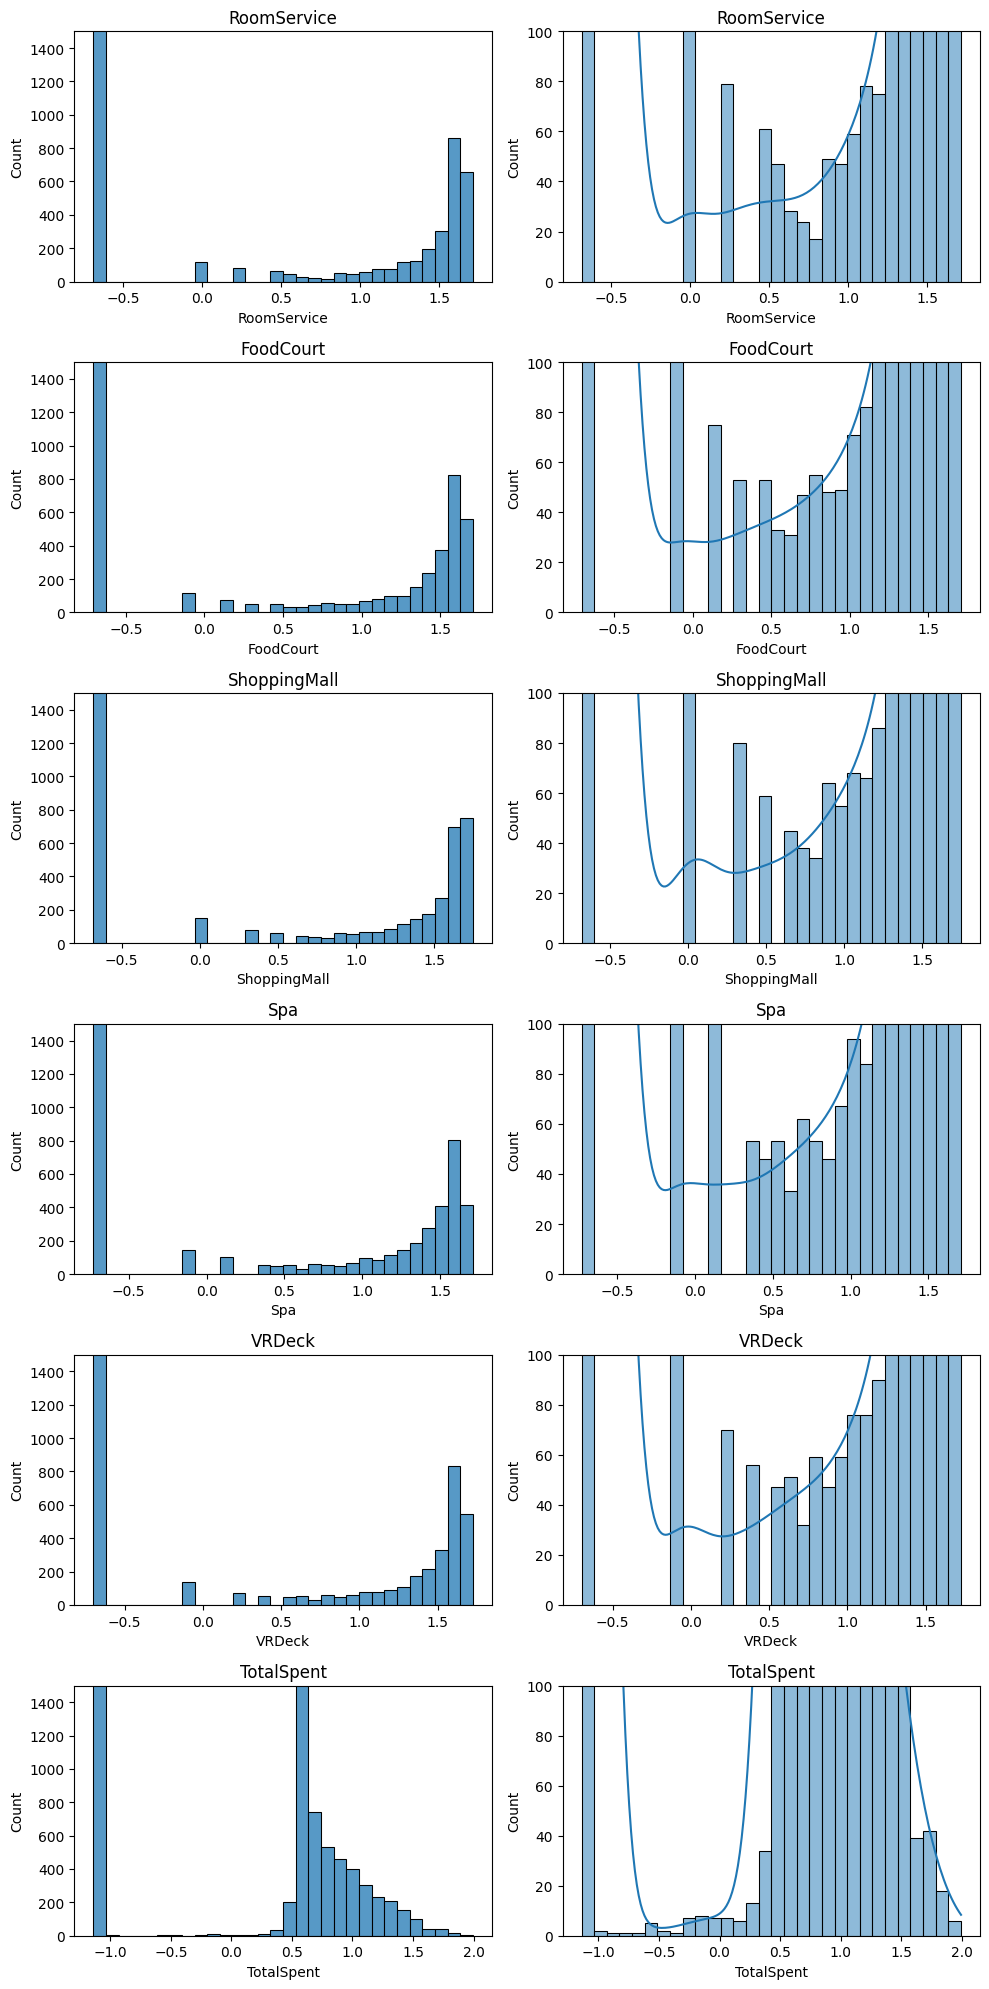

In [45]:
# Plot expenditure features
fig=plt.figure(figsize=(10,20))
for i, var_name in enumerate(exp_feats):
    # Left plot
    ax=fig.add_subplot(6,2,2*i+1)
    sns.histplot(data=boxcox, x=var_name, axes=ax, bins=30, kde=False)
    plt.ylim([0,1500])
    ax.set_title(var_name)

    # Right plot (truncated)
    ax=fig.add_subplot(6,2,2*i+2)
    sns.histplot(data=boxcox, x=var_name, axes=ax, bins=30, kde=True)
    plt.ylim([0,100])
    ax.set_title(var_name)
fig.tight_layout()  # Improves appearance a bit
plt.show()

It seems logging is better. Data's curve seems more normalized across all features.

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PassengerGNumber  8693 non-null   object 
 1   Group             8693 non-null   object 
 2   HomePlanet        8693 non-null   object 
 3   CryoSleep         8693 non-null   int64  
 4   Destination       8693 non-null   object 
 5   Age               8693 non-null   float64
 6   VIP               8693 non-null   bool   
 7   RoomService       8693 non-null   float64
 8   FoodCourt         8693 non-null   float64
 9   ShoppingMall      8693 non-null   float64
 10  Spa               8693 non-null   float64
 11  VRDeck            8693 non-null   float64
 12  Transported       8693 non-null   int64  
 13  Deck              8693 non-null   object 
 14  CabinNum          8693 non-null   object 
 15  Side              8693 non-null   object 
 16  FamilySize        8693 non-null   float64


In [47]:
# Let's make Side binary (it only has two variables) and change it's column name appropriately!

df.rename(columns={'Side': 'Port'}, inplace=True)

df.Port.replace(['P', 'S'], [1, 0], inplace=True)

In [48]:
df.columns

Index(['PassengerGNumber', 'Group', 'HomePlanet', 'CryoSleep', 'Destination',
       'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa',
       'VRDeck', 'Transported', 'Deck', 'CabinNum', 'Port', 'FamilySize',
       'TotalSpent', 'NoSpent'],
      dtype='object')

In [49]:
# For my OCDs case I need to reorder the columns hehe.

df.reindex(columns=['PassengerGNumber', 'Group', 'HomePlanet', 'CryoSleep', 'Destination',
       'Age', 'FamilySize', 'VIP', 'Deck', 'CabinNum', 'Port', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa',
       'VRDeck', 'TotalSpent', 'NoSpent', 'Transported'])

,PassengerGNumber,Group,HomePlanet,CryoSleep,Destination,Age,FamilySize,VIP,Deck,CabinNum,Port,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,TotalSpent,NoSpent,Transported
0,0001,01,Europa,0,TRAPPIST-1e,39.0,1.0,False,B,0,1,0.0,0.0,0.0,0.0,0.0,0.0,1,0
1,0002,01,Earth,0,TRAPPIST-1e,24.0,4.0,False,F,0,0,109.0,9.0,25.0,549.0,44.0,736.0,0,1
2,0003,01,Europa,0,TRAPPIST-1e,58.0,6.0,True,A,0,0,43.0,3576.0,0.0,6715.0,49.0,10383.0,0,0
3,0003,02,Europa,0,TRAPPIST-1e,33.0,6.0,False,A,0,0,0.0,1283.0,371.0,3329.0,193.0,5176.0,0,0
4,0004,01,Earth,0,TRAPPIST-1e,16.0,6.0,False,F,1,0,303.0,70.0,151.0,565.0,2.0,1091.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276,01,Europa,0,55 Cancri e,41.0,3.0,True,A,98,1,0.0,6819.0,0.0,1643.0,74.0,8536.0,0,0
8689,9278,01,Earth,1,PSO J318.5-22,18.0,2.0,False,G,1499,0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
8690,9279,01,Earth,0,TRAPPIST-1e,26.0,6.0,False,G,1500,0,0.0,0.0,1872.0,1.0,0.0,1873.0,0,1
8691,9280,01,Europa,0,55 Cancri e,32.0,6.0,False,E,608,0,0.0,1049.0,0.0,353.0,3235.0,4637.0,0,0


In [50]:
df.head()

,PassengerGNumber,Group,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,CabinNum,Port,FamilySize,TotalSpent,NoSpent
0,0001,01,Europa,0,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,0,B,0,1,1.0,0.0,1
1,0002,01,Earth,0,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,1,F,0,0,4.0,736.0,0
2,0003,01,Europa,0,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,0,A,0,0,6.0,10383.0,0
3,0003,02,Europa,0,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,0,A,0,0,6.0,5176.0,0
4,0004,01,Earth,0,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,1,F,1,0,6.0,1091.0,0


In [51]:
from sklearn.preprocessing import OneHotEncoder

cat_features = ['Group', 'HomePlanet', 'Destination', 'Deck']

ohe = OneHotEncoder(sparse_output = False)

ohe.fit(df[cat_features])

OneHotEncoder(sparse_output=False)

In [52]:
ohe.get_feature_names_out()

array(['Group_01', 'Group_02', 'Group_03', 'Group_04', 'Group_05',
       'Group_06', 'Group_07', 'Group_08', 'HomePlanet_Earth',
       'HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'Deck_A',
       'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G',
       'Deck_T'], dtype=object)

In [53]:
df[ohe.get_feature_names_out()] = ohe.transform(df[cat_features])

In [56]:
df.drop(columns=cat_features, inplace=True)

In [64]:
# Not always recommended, but since there are not so many columns let's see each one of them. In another world we save it as a CSV.

pd.set_option('display.max_columns', None)

df.head(10)

,PassengerGNumber,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,CabinNum,Port,FamilySize,TotalSpent,NoSpent,Group_01,Group_02,Group_03,Group_04,Group_05,Group_06,Group_07,Group_08,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T
0,1,0,39.0,False,0.0,0.0,0.0,0.0,0.0,0,0,1,1.0,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0,24.0,False,109.0,9.0,25.0,549.0,44.0,1,0,0,4.0,736.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,0,58.0,True,43.0,3576.0,0.0,6715.0,49.0,0,0,0,6.0,10383.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0,33.0,False,0.0,1283.0,371.0,3329.0,193.0,0,0,0,6.0,5176.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0,16.0,False,303.0,70.0,151.0,565.0,2.0,1,1,0,6.0,1091.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,5,0,44.0,False,0.0,483.0,0.0,291.0,0.0,1,0,1,7.0,774.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,6,0,26.0,False,42.0,1539.0,3.0,0.0,0.0,1,2,0,7.0,1584.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,6,1,28.0,False,0.0,0.0,0.0,0.0,0.0,1,0,0,7.0,0.0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,7,0,35.0,False,0.0,785.0,17.0,216.0,0.0,1,3,0,5.0,1018.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,8,1,14.0,False,0.0,0.0,0.0,0.0,0.0,1,1,1,3.0,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


# To do:

1. Standard Scaler!
2. Make everything into a Pipeline.
3. Organize!

t